In [165]:
import numpy as np
import cv2
from iced import filter
from iced import normalization
from utility import *
import matplotlib.pyplot as plt
from matplotlib import colors
from iced import normalization
from iced import filter
from scipy.stats import t
import os
%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/home/bzr0014/watson/scripts/virt/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [160]:
#Defining the file directory
data_name = "call4"
directory = "../data/extracted_all_contact_%s"%data_name
print(directory)

../data/extracted_all_contact_call4


In [161]:
#create the full chrmosomal contact map for mit
N = 0
M = 0
ns = np.zeros((24, 2), dtype='uint32')
ms = np.zeros((24, 2), dtype='uint32')
for chr1 in range(1, 24):
    chr2 = chr1
    mit = readMat("%s/chr_%02d_%02d_500kb.mat"%\
                  (directory, chr1, chr2), delimiter="\t")
    n, m = mit.shape
    ns[chr1, 0] = N
    ns[chr1, 1] = n
    ms[chr1, 0] = M
    ms[chr1, 1] = m
    N += n
    M += m
    #print(chr1, n, m)
print(N, M)
#print(ns, ms)


(6053, 6053)


In [162]:
grand_scheme_of_things = np.zeros((N, M))
for chr1 in range(1, 24):
    for chr2 in range(chr1, 24):
        mit = readMat("%s/chr_%02d_%02d_500kb.mat"%\
                      (directory, chr1, chr2), delimiter="\t")
        beg_n = ns[chr1, 0]
        n0 = ns[chr1, 1]
        beg_m = ms[chr2, 0]
        m0 = ms[chr2, 1]
        n1, m1 = mit.shape
        n = np.min([n0, n1])
        m = np.min([m0, m1])
        #print(chr1, chr2, beg_n, n, beg_m, m)
        grand_scheme_of_things[beg_n:beg_n+n, beg_m:beg_m+m] = mit[:n,:m]
        grand_scheme_of_things[beg_m:beg_m+m, beg_n:beg_n+n] = mit.T[:m,:n]

In [129]:
backup_mit = grand_scheme_of_things * 1.

In [131]:
backup_all = grand_scheme_of_things * 1.

Number of columnts: 1


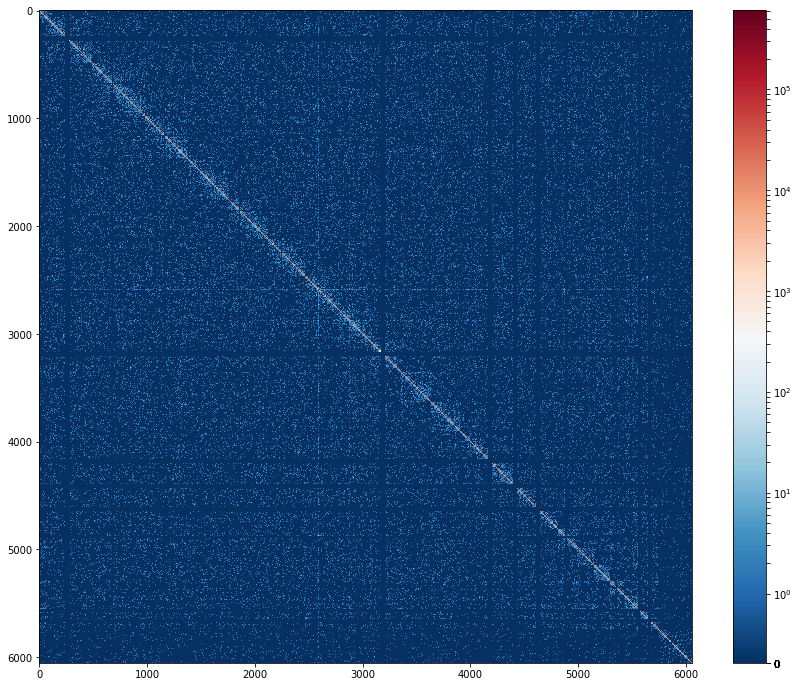

In [166]:
pylab.rcParams['figure.figsize'] = (15, 12)
#fig, axes = plt.subplots(ncols=1)
#m = axes.imshow(grand_scheme_of_things, cmap="RdBu_r", norm=colors.SymLogNorm(1))
#cb = fig.colorbar(m)
#plt.show()
images = [ grand_scheme_of_things]
showImages(images, 1, color_bar = True)

In [133]:
normed = filter.filter_low_counts\
(grand_scheme_of_things * 1., lengths=ns[:, 1], percentage=0.1)

In [134]:
normed2 = normalization.ICE_normalization(normed)

Number of columnts: 1


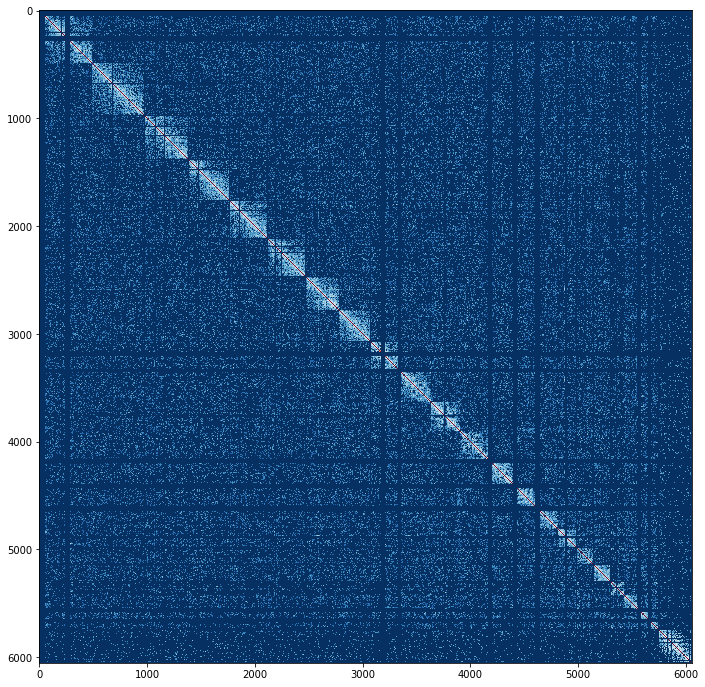

In [136]:
pylab.rcParams['figure.figsize'] = (15, 12)
images = [ normed2 ]
showImages(images, 1, color_bar=False)

In [163]:
writeMatToFile(grand_scheme_of_things, "%s/all_in_one_500kb.mat"%(directory) , delimiter=",")

writing to ../data/extracted_all_contact_call4/all_in_one_500kb.mat


In [164]:
writeMatToFile(ns, "%s/lengths_500kb.mat"%(directory) , delimiter=",")

writing to ../data/extracted_all_contact_call4/lengths_500kb.mat
